In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv')
df.head()

In [ ]:
px.scatter(df,x='Age',y='EstimatedSalary',color='Purchased',symbol='Purchased')

In [ ]:
df.Purchased.value_counts().plot(kind='bar')

In [ ]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,)
xtrain.shape,xtest.shape

In [ ]:
m = LogisticRegression()
m.fit(xtrain, ytrain)

In [ ]:
m.score(xtest,ytest) # you should not see the score like this, we use other stuff

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
ypred = m.predict(xtest)

In [ ]:
import seaborn as sns

In [16]:
cm = confusion_matrix(ytest, ypred)
print(cm)


[[47  3]
 [10 20]]


In [17]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.87      0.67      0.75        30

    accuracy                           0.84        80
   macro avg       0.85      0.80      0.82        80
weighted avg       0.84      0.84      0.83        80



In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


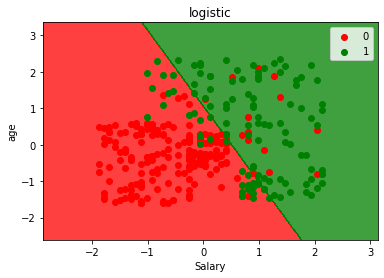

In [15]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"logistic",'Salary','age')

# prediction